Majorana Qubit Simulation

 a single logical qubit in a Majorana system is encoded into 4 majorana modes where |0> and |1> correspond to even/odd fermion parity states of the Majoranas and the logical states are non locally encoded making them robust to local errors
 for N qubits, we need 2N+2 majoranas

We are going to build a Hadamard, Phase, and CNOT gate

First, we are going to showcase a simple implementation of qubit algebra as we learned in class

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

In [14]:
#construct the Pauli matrices and identity
X = np.array([[0,1], [1,0]], dtype=complex)
Y = np.array([[0,-1j], [1j,0]], dtype=complex)
Z = np.array ([[1,0], [0,-1]], dtype=complex)
I = np.eye(2, dtype=complex)

def apply_gate(state,gate):
    return gate @ state #matrix multiplier

In [15]:
# Qubit starting at|0>
myqubit = np.array([1,0], dtype=complex) 

In [16]:
#phase gate - this is similar to the result of braiding two majorana fermions
S = np.array([[1,0],[0,1j]])

#hadamard gate
H = (1/np.sqrt(2)) * np.array([[1,1],[1,-1]])

In [17]:
#simple algebraic quantum simulator...
state = apply_gate(myqubit, H)
print("applying hadamard", state)

applying hadamard [0.70710678+0.j 0.70710678+0.j]


Majorana Algebra

In [18]:
# We take g_i and g_j as the gamma products... matrices acting on a 2d qubit space and we will represent majoranas using pauli matrices

# matrix multiplication can occasionally lead to some errors, so I did a simpler operation
gamma12 = 1j * Z # gamma1 * gamma2 = iZ
gamma23 = 1j * X # gamma2 * gamma3 = iX
gamma13 = -1j * Y # gamma1 * gamma3 = -iY

#braiding operator U12 similar to an S gate
def braiding_operator(gamma_product):
    theta = np.pi / 4
    return np.cos(theta) * I - np.sin(theta) * gamma_product
U_12 = braiding_operator(gamma12)
U_23 = braiding_operator(gamma23)
U_13 = braiding_operator(gamma13)

state_after_U12 = apply_gate(myqubit,U_12)
print("braided state of U_12 |0>", state_after_U12)

#Construct a braided hadamard
U_H = U_23 @ U_12 @ U_23
braided_hadamard = apply_gate(myqubit, U_H)
print("braided state after hadamard", braided_hadamard)

reapply = apply_gate(braided_hadamard, U_H)
print("reapplying hadamard", reapply)
reapply = apply_gate(reapply, U_H)
print("reapplying hadamard", reapply)
reapply = apply_gate(reapply, U_H)
print("reapplying hadamard", reapply)

braided state of U_12 |0> [0.70710678-0.70710678j 0.        +0.j        ]
braided state after hadamard [0.-0.70710678j 0.-0.70710678j]
reapplying hadamard [-1.+0.j  0.+0.j]
reapplying hadamard [0.+0.70710678j 0.+0.70710678j]
reapplying hadamard [1.+0.j 0.+0.j]


In [19]:
from functools import reduce

#jordan wigner mapping
def gamma_map(index, total_qubits):
    # index 1 is gamma1, index 2 is gamma 2 and so on
    q = (index + 1) // 2  # qubit number - finds which qubit the majorana operator belongs to
    op = X if index % 2 == 1 else Y  # odd index = X, even index = Y
    prefix = [Z] * (q - 1)           # jordan wigner string - Z operator on every qubit before the current qubit to maintain fermionic anticommutation
    # q = 3 would be Z * Z
    paulis = prefix + [op] + [I] * (total_qubits - q) # take the prefix of Z's, then the even or odd X/Y, then the identity 
    return reduce(np.kron, paulis) #applies kronecker product to all of the matrices in the pauli operator list

def braiding_multiple(gamma_i, gamma_j):
    theta = np.pi / 4
    gamma_product = gamma_i @ gamma_j
    dim = gamma_i.shape[0] # need to get the matrix dimension
    return np.cos(theta) * np.eye(dim) - np.sin(theta) * gamma_product * (1/sqrt(2))


In [20]:
#2qubit state
base1 = np.array([1, 0, 0, 0], dtype=complex)
base2 = np.array([0, 1, 0, 0], dtype=complex)
base3 = np.array([0, 0, 1, 0], dtype=complex)
base4 = np.array([0, 0, 0, 1], dtype=complex)

# Get Majoranas
gamma1 = gamma_map(1, 2)
gamma2 = gamma_map(2, 2)
gamma3 = 1j * np.kron(Z, X) # found an error gamma map cannot be used for cnot gates
gamma4 = 1j * np.kron(Z, Y)

print("gamma3", gamma3)
print("gamma4", gamma4)
#check that gamma_3*gamma4 + gamma_4*gamma_3 = 0
value = gamma3@gamma4 + gamma4@gamma3
print("check that gamma_3*gamma4 + gamma_4*gamma_3 = 0... we get", value)
print("")


U_34 = braiding_multiple(gamma3,gamma4)
print("U34", U_34)
H_2 = np.kron(I,H) #hadamard on qubit 2
CNOT = H_2 @ U_34 @ H_2
CNOT1 = apply_gate(base1,CNOT)
CNOT2 = apply_gate(base2,CNOT)
CNOT3 = apply_gate(base3,CNOT)
CNOT4 = apply_gate(base4,CNOT)

print("result of applying CNOT1 gate", CNOT1)
print("result of applying CNOT2 gate", CNOT2)
print("result of applying CNOT3 gate", CNOT3)
print("result of applying CNOT4 gate", CNOT4)

gamma3 [[ 0.+0.j  0.+1.j  0.+0.j  0.+0.j]
 [ 0.+1.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -0.+0.j -0.-1.j]
 [ 0.+0.j  0.+0.j -0.-1.j -0.+0.j]]
gamma4 [[ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [-1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -0.+0.j -1.+0.j]
 [ 0.+0.j  0.+0.j  1.-0.j -0.+0.j]]
check that gamma_3*gamma4 + gamma_4*gamma_3 = 0... we get [[0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]]

U34 [[0.70710678+0.5j 0.        +0.j  0.        +0.j  0.        +0.j ]
 [0.        +0.j  0.70710678-0.5j 0.        +0.j  0.        +0.j ]
 [0.        +0.j  0.        +0.j  0.70710678+0.5j 0.        +0.j ]
 [0.        +0.j  0.        +0.j  0.        +0.j  0.70710678-0.5j]]
result of applying CNOT1 gate [0.70710678-1.11855716e-17j 0.        +5.00000000e-01j
 0.        +0.00000000e+00j 0.        +0.00000000e+00j]
result of applying CNOT2 gate [0.        +5.00000000e-01j 0.70710678-1.11855716e-17j
 0.        +0.0000000

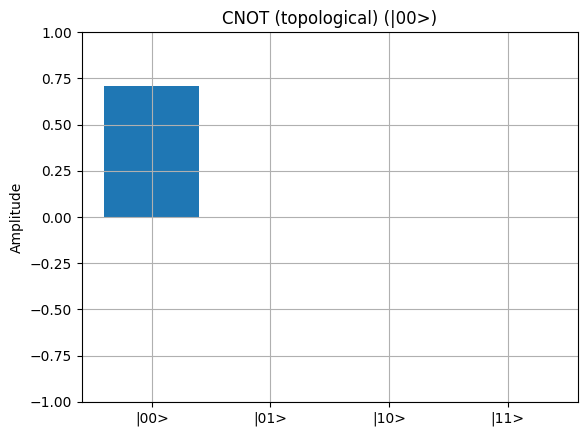

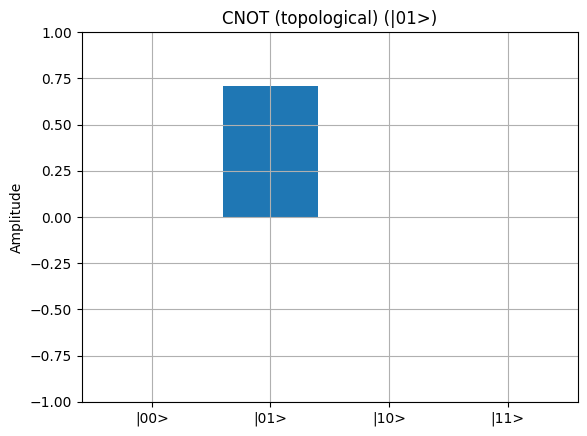

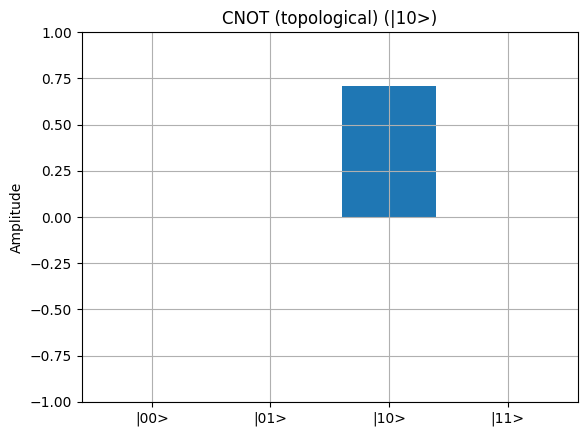

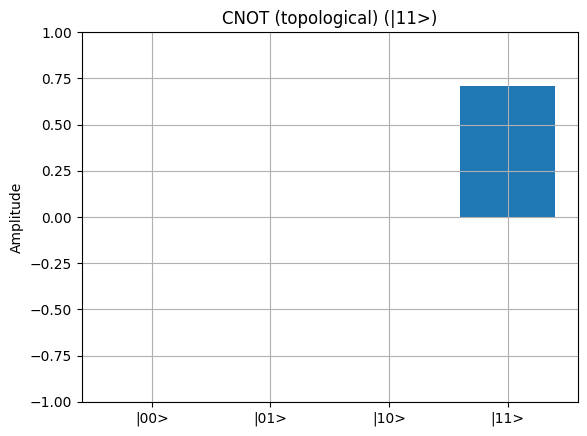

In [21]:
basis_labels = ['|00>', '|01>', '|10>', '|11>']

def plot_state_amplitudes(state, title):
    fig, ax = plt.subplots()
    real_parts = state.real
    ax.bar(basis_labels, real_parts)
    ax.set_ylim(-1, 1)
    ax.set_ylabel('Amplitude')
    ax.set_title(title)
    plt.grid(True)
    plt.show()
    
plot_state_amplitudes(CNOT1, 'CNOT (topological) (|00>)')
plot_state_amplitudes(CNOT2, 'CNOT (topological) (|01>)')
plot_state_amplitudes(CNOT3, 'CNOT (topological) (|10>)')
plot_state_amplitudes(CNOT4, 'CNOT (topological) (|11>)')

We see the demonstration of the limits of braiding only computation here which creates superposition

C:\Users\joeyh\AppData\Local\Temp\ipykernel_12204\2325045260.py:5: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  real_parts = state.real


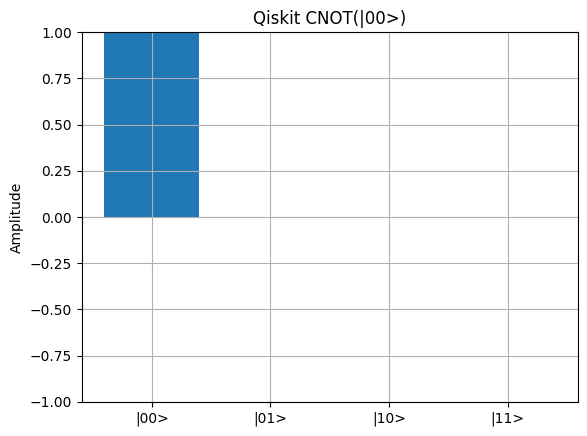

C:\Users\joeyh\AppData\Local\Temp\ipykernel_12204\2325045260.py:5: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  real_parts = state.real


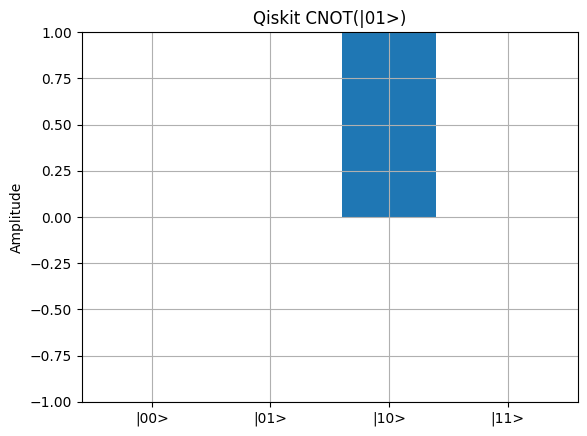

C:\Users\joeyh\AppData\Local\Temp\ipykernel_12204\2325045260.py:5: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  real_parts = state.real


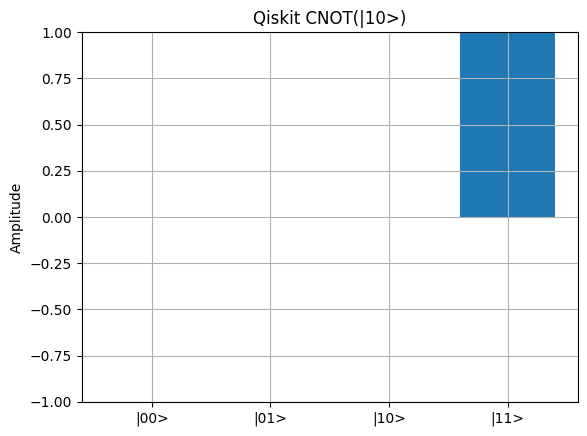

C:\Users\joeyh\AppData\Local\Temp\ipykernel_12204\2325045260.py:5: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  real_parts = state.real


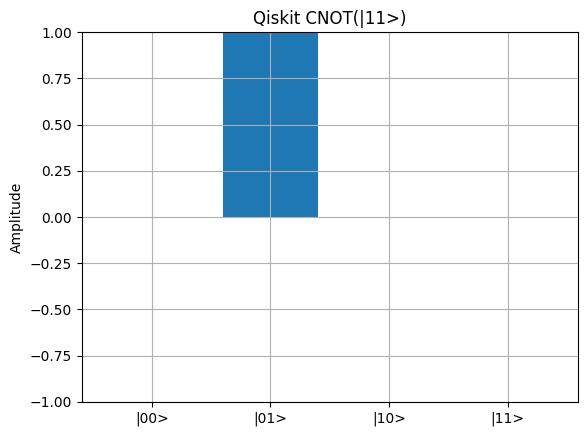

In [22]:
from qiskit import QuantumCircuit
from qiskit_aer import StatevectorSimulator
from qiskit.quantum_info import Statevector

def qiskit_cnot(input_state_label):
    qc = QuantumCircuit(2) #2 qubit system

    # defining the basis states
    if input_state_label == '|01>':
        qc.x(1) #pauli x gate
    elif input_state_label == '|10>':
        qc.x(0)
    elif input_state_label == '|11>':
        qc.x(0)
        qc.x(1)

    # Apply CNOT with first qubit as control and target second
    qc.cx(0, 1)

    simulator = StatevectorSimulator() #using state vector simulator for backend
    result = simulator.run(qc).result()
    final_state = result.get_statevector()
    return final_state

for label in basis_labels:
    state = qiskit_cnot(label)
    plot_state_amplitudes(state, f'Qiskit CNOT({label})')

Grover's Algorithm Qiskit

{'00': 76, '11': 749, '01': 93, '10': 82}


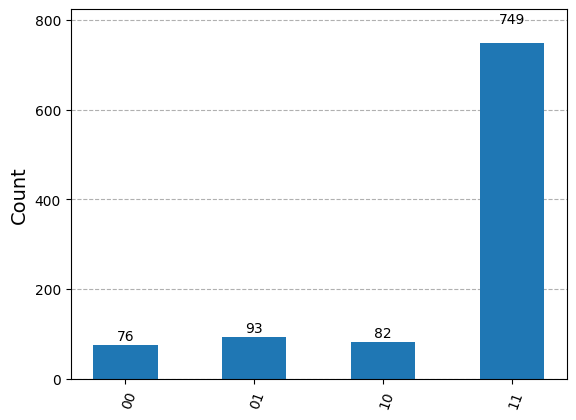

In [23]:
from qiskit import QuantumCircuit, transpile
import qiskit_aer.noise as noise
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram

#building the circuit and the gates
grover = QuantumCircuit(2)
grover.h([0, 1])
grover.cz(0, 1)
grover.h([0, 1])
grover.x([0, 1])
grover.h(1)
grover.cx(0, 1)
grover.h(1)
grover.x([0, 1])
grover.h([0, 1])

grover.measure_all()
grover.draw()

noise_model = noise.NoiseModel()
error_prob = 0.05
depolarizing = noise.depolarizing_error(error_prob, 1)

# adding noise to the gates used
noise_model.add_all_qubit_quantum_error(depolarizing, ['u1', 'u2', 'u3', 'h', 'x'])

cnot_error = noise.depolarizing_error(0.1, 2)  # adding a 10% error to cnot
noise_model.add_all_qubit_quantum_error(cnot_error, ['cx'])
backend_noisy = AerSimulator(noise_model=noise_model)
# ;combine grover with noise
t_grover = transpile(grover, backend_noisy)

# simulate
result = backend_noisy.run(t_grover, shots=1000).result()
%matplotlib inline

# look at results
counts = result.get_counts()
print(counts)
plot_histogram(counts)
plt.show()

Braiding topological Grover's

final grover state [ 0.14448667+0.j  0.14448667+0.j  0.14448667+0.j  0.14448667+0.j
  0.14448667+0.j  0.14448667+0.j  0.14448667+0.j  0.14448667+0.j
  0.14448667+0.j  0.14448667+0.j  0.14448667+0.j  0.14448667+0.j
  0.14448667+0.j  0.14448667+0.j  0.14448667+0.j -0.82876658+0.j]
phase:  3.141592653589793
target amplitude:  (-0.8287665843963624+0j)


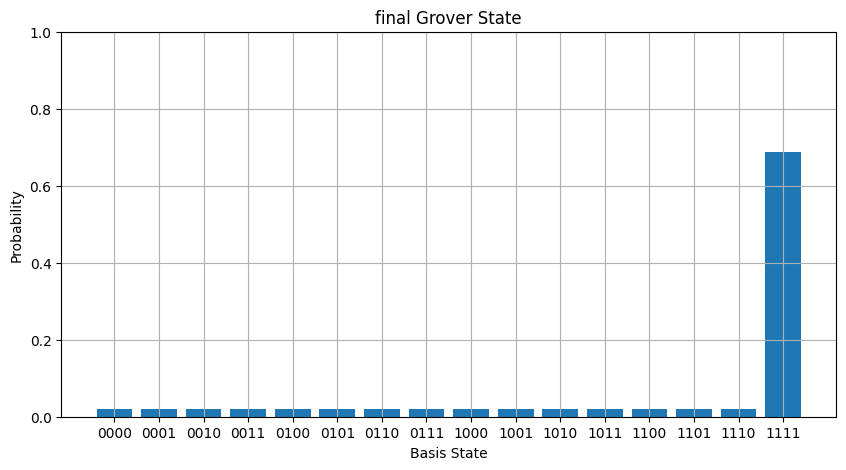

In [65]:
#need all kronecker products for two qubits (Pauli matrices defined earlier)
IX = np.kron(I, X)
IY = np.kron(I, Y)
IZ = np.kron(I, Z)
XI = np.kron(X, I)
YI = np.kron(Y, I)
ZI = np.kron(Z, I)
def kron4(A, B, C, D):
    return np.kron(np.kron(np.kron(A, B), C), D) #bigger kronecker product
#we will redefine gammas just to maintain consistency and enter a higher space
#needed to look up ideal definition for gamma particles
gamma1 = kron4(X, I, I, I)
gamma2 = kron4(Y, I, I, I)
gamma3 = kron4(Z, X, I, I)
gamma4 = kron4(Z, Y, I, I)

gamma5 = kron4(Z, Z, X, I)
gamma6 = kron4(Z, Z, Y, I)
gamma7 = kron4(Z, Z, Z, X)
gamma8 = kron4(Z, Z, Z, Y)

def braid(gamma_i, gamma_j):
    theta = np.pi/4
    gamma_product = gamma_i @ gamma_j
    return np.cos(theta)*np.eye(16) - np.sin(theta)*gamma_product #need bigger Identity matrix so redefine

#physical hilbert space is 2^4 because 4 majoranas in each 2 qubits
def hadamard_braid(qubit=0):
    if qubit == 0:
        U1 = braid(gamma1,gamma2) #braid 1st two majoranas X rotation
        U2=braid(gamma1,gamma3) #braid another Z rotation
        U3 = braid(gamma2,gamma3) #braid a third phase correction
        return U3 @ U2 @ U1
    else:
        U4 = braid(gamma3,gamma4)
        U5 = braid(gamma3,gamma5)
        U6 = braid(gamma4,gamma5)
        return U6 @ U5 @ U4

#had to look up more advanced way to plot state as original was not working
def plot_state_probabilities(state, title="State Probabilities"):
    probs = np.abs(state)**2
    labels = [format(i, '04b') for i in range(len(state))]
    fig, ax = plt.subplots(figsize=(10,5))
    ax.bar(labels, probs)
    ax.set_ylim(0, 1)
    ax.set_ylabel('Probability')
    ax.set_xlabel('Basis State')
    ax.set_title(title)
    plt.grid(True)
    plt.show()

# start at |00>
state = np.zeros(16, dtype=complex)
state[0] = 1.0
#make gates
H0 = kron4(H, I, I, I)
H1 = kron4(I, I, H, I)
H2 = kron4(I, H, I, I)
H3 = kron4(I, I, I, H)
X0 = kron4(X, I, I, I)
X1 = kron4(I, I, X, I)
X2 = kron4(I, X, I, I)
X3 = kron4(I, I, I, X)


CZ = np.eye(16, dtype=complex)
target = 15
CZ[target,target] = -1.0 #target 

def apply_H(state):
    state = apply_gate(state, H0)
    state = apply_gate(state, H1)
    state = apply_gate(state, H2)
    state = apply_gate(state, H3)
    return state
def apply_x(state):
    state = apply_gate(state, X0)
    state = apply_gate(state, X1)
    state = apply_gate(state, X2)
    state = apply_gate(state, X3)
    return state
#initial hadamard
state = apply_H(state)

for _ in range(10):  # shooting multiple times to get better prob
    # flip the amplitude (Uf as discussed in class)
    state = apply_gate(state, CZ)
    # Us gate 
    state = apply_H(state)
    state = apply_x(state)
    state = apply_gate(state, CZ)
    state = apply_x(state)
    state = apply_H(state)
state = state / np.linalg.norm(state)
print("final grover state", state)
print("phase: ", np.angle(state[15]))
print("target amplitude: ", state[target])
plot_state_probabilities(state, "final Grover State")